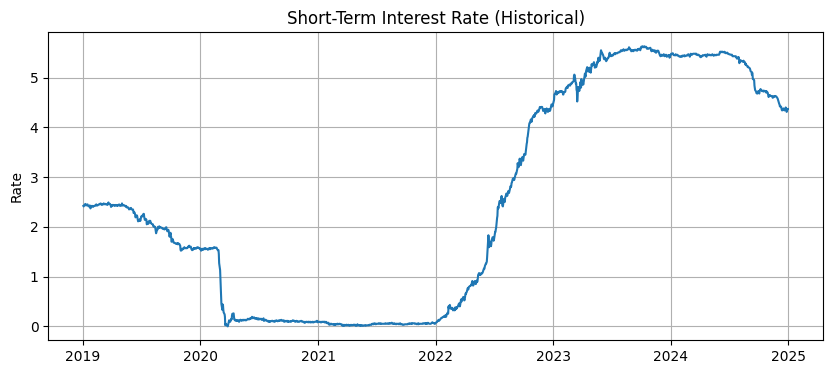

Calibrated Vasicek parameters:
a = 0.0000, b = 1.0000, sigma = 0.5746


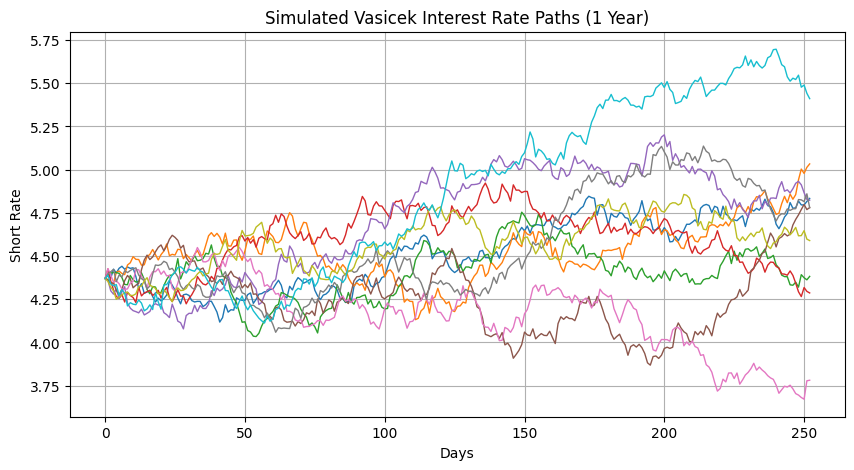

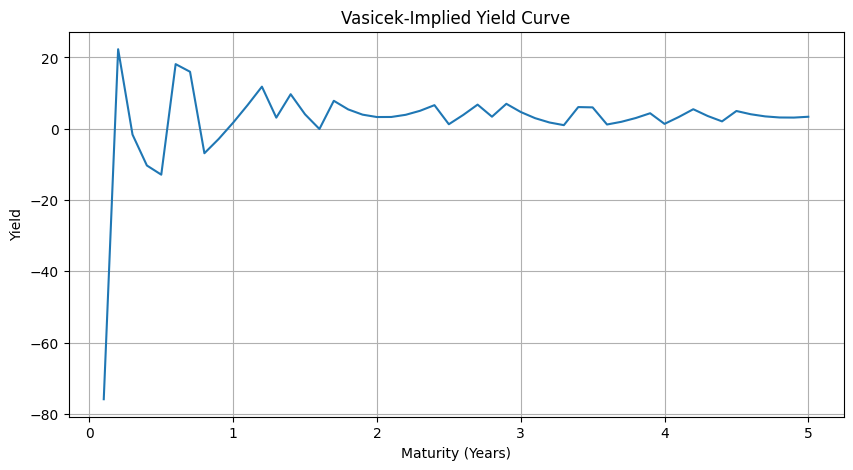

In [12]:
# notebooks/vasicek_workflow.ipynb

# 1. Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.vasicek_model import calibrate_vasicek, simulate_vasicek_paths, zero_coupon_bond_price

# Load your interest rate data (replace with your path if different)
df = pd.read_csv(r'D://vasicek-bond-arbitrage//data//interest_rates.csv', parse_dates=['DATE'], index_col='DATE')
short_rates = df['Close']  # Or use 'Rate' if that's the column

# 2. Visualize the short-rate time series
plt.figure(figsize=(10, 4))
plt.plot(short_rates)
plt.title("Short-Term Interest Rate (Historical)")
plt.ylabel("Rate")
plt.grid(True)
plt.show()

# 3. Calibrate Vasicek model
dt = 1/252  # Assuming daily data
a, b, sigma = calibrate_vasicek(short_rates, dt)
print(f"Calibrated Vasicek parameters:\na = {a:.4f}, b = {b:.4f}, sigma = {sigma:.4f}")

# 4. Simulate Vasicek paths
r0 = short_rates.iloc[-1]
n_paths = 10
n_steps = 252
T = 1  # 1 year
paths = simulate_vasicek_paths(r0, a, b, sigma, T=T, n_steps=n_steps, n_paths=n_paths, seed=42)

# 5. Plot simulated paths
plt.figure(figsize=(10, 5))
for i in range(n_paths):
    plt.plot(paths[:, i], lw=1)
plt.title("Simulated Vasicek Interest Rate Paths (1 Year)")
plt.xlabel("Days")
plt.ylabel("Short Rate")
plt.grid(True)
plt.show()

# 6. Price Zero-Coupon Bonds across maturities
maturities = np.linspace(0.1, 5, 50)
bond_prices = [zero_coupon_bond_price(r0, a, b, sigma, T) for T in maturities]

# 7. Plot yield curve
yields = -np.log(bond_prices) / maturities
plt.figure(figsize=(10, 5))
plt.plot(maturities, yields)
plt.title("Vasicek-Implied Yield Curve")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield")
plt.grid(True)
plt.show()
